In [2]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [11]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(cleveland_data)<-c("age","sex","chest_pain","rest_bps","cholestrol_level","high_fbs?",
                            "rest_electrographics","max_heartrate","exercise_induced_angina","oldpeak","slope",
                            "colored_major_vessels","thal","risk_level")
                            #Note, generally 0=no issue and 1-4=problem
cleveland_cat_data<-cleveland_data|>
                    mutate(exercise_induced_angina=case_when(exercise_induced_angina==0~"No",exercise_induced_angina==1~"Yes"))|>
                    mutate(sex=case_when(sex==0~"female",sex==1~"male"))
cleveland_cat_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,rest_bps,cholestrol_level,high_fbs?,rest_electrographics,max_heartrate,exercise_induced_angina,oldpeak,slope,colored_major_vessels,thal,risk_level
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,male,4,160,286,0,2,108,Yes,1.5,2,3.0,3.0,2
67,male,4,120,229,0,2,129,Yes,2.6,2,2.0,7.0,1
37,male,3,130,250,0,0,187,No,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,Yes,1.2,2,1.0,7.0,3
57,female,2,130,236,0,2,174,No,0.0,2,1.0,3.0,1
38,male,3,138,175,0,0,173,No,0.0,1,?,3.0,0


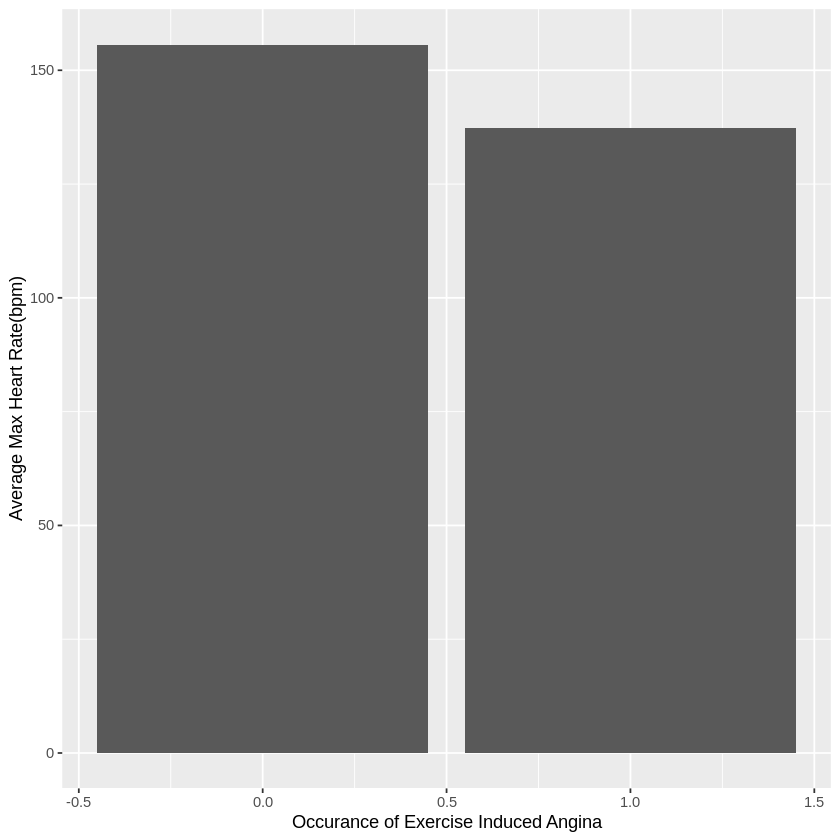

In [12]:
cleveland_avg_data<-cleveland_catdata|>
                select(max_heartrate, exercise_induced_angina)|>
                group_by(exercise_induced_angina)|>
                summarize("avg_max_heartrate"=mean(max_heartrate, na.rm=TRUE))

cleveland_maxrate<-cleveland_avg_data|>
                    ggplot(aes(x=exercise_induced_angina,y=avg_max_heartrate))+
                    geom_bar(stat="identity")+
                    labs(x="Occurance of Exercise Induced Angina",y="Average Max Heart Rate(bpm)")
cleveland_maxrate
